In [11]:
import math
from scipy.interpolate import interp1d
import numpy as np
import matplotlib.pyplot as plt
from numpy import genfromtxt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [12]:
def alfa(awa,sa):
    alfa = awa-sa
    if alfa > 180:
        alfa = alfa % -180
    elif alfa < -180:
        alfa = alfa % 180
    return alfa

In [15]:
dim = 90
X = np.linspace(0,dim*2,num=dim*2)
Y = []
y = []

awa = 45
for sa in range(-90,dim):
    rho = 1.225 # kg/m^3
    v = 5 # m/s

    h1 = 1333.33/1000 #[m] höjd för del 1
    c1 = (878.25+807.29)/2000 #[m]Korda för del 1
    h2 = 666.67/1000 #[m] höjd för del 2
    c2 = (757.11+640.50)/2000 #[m] Korda för del 2
    h3 = 666.67/1000 #[m] höjd för del 3
    c3 = (586.67+319.8)/2000 #[m] Korda för del 3

    alpha = alfa(awa,sa)

    # alfa,cl,cd cm
    clcdcm = np.array([[0, 0, 0.0026, 0],
    [1,    0.0996,    0.0039,    0],
    [2,    0.2010,    0.0052,    0],
    [3,    0.3039,    0.0066,    0],
    [4,    0.4083,    0.0080,    0],
    [5,    0.5141,    0.0094,    0],
    [6,    0.6252,    0.0109,    0.0000],
    [7,    0.7371,    0.0123,    0.0100],
    [8,    0.8397,    0.0138,    0.0150],
    [9,    0.9320,    0.0154,    0.0150],
    [10,    1.0188,    0.0174,    0.0300],
    [11,    1.1045,    0.0197,    0.0320],
    [12,    1.1827,    0.0221,    0.0330],
    [13,    1.2499,    0.0248,    0.0350],
    [14,    1.2946,    0.0282,    0.0400],
    [15,    1.3045,    0.0322,    0.0500],
    [16,    1.3101,    0.0373,    0.0200],
    [17,    1.3118,    0.0435,    0.0150],
    [18,    1.3119,    0.0513,    0.0100],
    [19,    1.3119,    0.0680,    0.0050],
    [20,    1.3119,    0.1000,         0],
    [21,    1.2969,    0.2256,   -0.0250],
    [22,    1.2647,    0.3135,   -0.0500],
    [23,    1.2130,    0.3613,   -0.0533],
    [24,    1.1530,    0.3988,   -0.0567],
    [25,    1.0971,    0.4292,   -0.0600],
    [26,    1.0394,    0.4555,   -0.0760],
    [27,    0.9732,    0.4812,   -0.0920],
    [28,    0.9151,    0.5092,   -0.1080],
    [29,    0.8795,    0.5425,   -0.1240],
    [30,    0.8699,    0.5777,   -0.1400],
    [35,    0.9667,    0.7549,   -0.1500],
    [40,    1.0380,    0.9162,   -0.1600],
    [45,    1.0503,    1.0657,   -0.1600],
    [50,    1.0267,    1.2064,   -0.2600],
    [55,    0.9744,    1.3410,   -0.0500],
    [60,    0.8908,    1.4705,   -0.2700],
    [65,    0.7665,    1.5773,   -0.1500],
    [70,    0.6417,    1.6660,   -0.4000],
    [75,    0.5126,    1.7387,   -0.3000],
    [80,    0.3763,    1.7814,   -0.2000],
    [85,    0.2367,    1.7998,   -0.4000],
    [90,    0.0961,    1.8043,   -0.4500],
    [95,    0.0431,    1.7906,   -0.4200], 
    [100,   0.1820,    1.7642,   -0.4500],
    [105,   0.3167,    1.7114,   -0.4500],
    [110,   0.4421,    1.6471,   -0.2000],
    [115,   0.5591,    1.5679,   -0.4000],
    [120,   0.6714,    1.4745,   -0.5500],
    [125,   0.7695,    1.3653,   -0.5000],
    [130,   0.8413,    1.2408,   -0.5000],
    [135,   0.9382,    1.0995,   -0.5400],
    [140,   0.9777,    0.9406,   -0.4700],
    [145,   0.9165,    0.7655,   -0.4000],
    [150,   0.7731,    0.5921,   -0.4000],
    [155,   0.6644,    0.4428,   -0.3200],
    [160,   0.6400,    0.3323,   -0.3000],
    [165,   0.6805,    0.2363,   -0.3500],
    [170,   0.8460,    0.1533,   -0.4200],
    [175,   0.6705,    0.0648,   -0.3000],
    [180,         0,    0.0311,         0]])

    tmp1 = interp1d(clcdcm[:,0],clcdcm[:,1],kind='cubic')
    tmp2 = interp1d(clcdcm[:,0],clcdcm[:,2],kind='cubic')
    tmp3 = interp1d(clcdcm[:,0],clcdcm[:,3],kind='cubic')

    cl = tmp1(abs(alpha))
    cd = tmp2(abs(alpha))
    cm = tmp3(abs(alpha))

    # Lift
    L1 = 1/2*rho*v**2*c1*h1*cl
    L2 = 1/2*rho*v**2*c2*h2*cl
    L3 = 1/2*rho*v**2*c3*h3*cl
    L = L1 + L2 + L3

    # Drag
    D1 = 1/2*rho*v**2*c1*h1*cd
    D2 = 1/2*rho*v**2*c2*h2*cd
    D3 = 1/2*rho*v**2*c3*h3*cd
    D = D1 + D2 + D3

    if 0 <= alpha and alpha <= 90:
        Lx = L*math.cos(math.radians(awa-90))
    elif 90 < alpha and alpha <= 180:
        Lx = L*math.cos(math.radians(awa+90))
    elif -180 <= alpha and alpha <= -90:
        Lx = L*math.cos(math.radians(awa-90))
    elif -90 < alpha and alpha < 0:
        Lx = L*math.cos(math.radians(awa+90))

    Dx = D*(math.cos(math.radians(awa+180)))
    Y.append(Dx+Lx)


Text(0.5, 1.0, 'Sail dynamics during 45 awa')

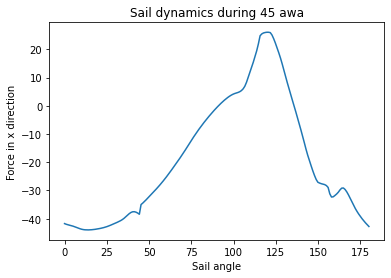

In [16]:
plt.plot(X,Y)
plt.xlabel("Sail angle")
plt.ylabel("Force in x direction")
plt.title("Sail dynamics during {} awa".format(awa))
#plt.xticks(np.arange(min(X), max(X)+1, 30))
#plt.yticks(np.arange(min(Y), max(Y)+1, 5))

ValueError: x and y must have same first dimension, but have shapes (360,) and (0,)

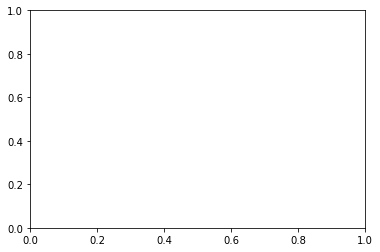

In [4]:
plt.plot(X,y)
plt.xlabel("Sail angle")
plt.ylabel("Force in x direction")
plt.title("Sail dynamics during {} awa".format(awa))
plt.xticks(np.arange(min(X), max(X)+1, 30))
plt.yticks(np.arange(min(y), max(y)+1, 5))

Text(0, 0.5, 'Lift and Drag')

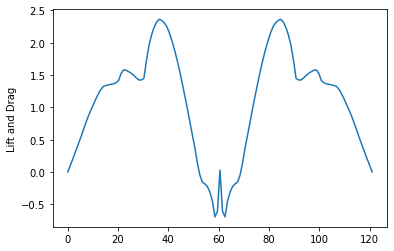

In [15]:
X_plot = np.linspace(0,121,num=121)
plt.plot(X_plot,clcdcm[:,1]+clcdcm[:,2])
plt.ylabel("Lift and Drag")